In [1]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/Python/Data')

In [2]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [3]:
# Importing relevant libraries
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [4]:
# Reading the dataset
df_bank = pd.read_csv('/Users/ssg/Desktop/Bank_data_NB_N.csv')

In [5]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_bank.shape

(45211, 17)

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_bank['y'].value_counts()/len(df_bank)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [9]:
# Remove data with any missing information for now
df_bank = df_bank.dropna()

In [10]:
df_bank.shape

(45211, 17)

In [11]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Data Exploration

In [12]:
# Get summary stats for the categorical features
df_bank.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [13]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# Create the feature/flag for Dep variable - Attrition status
df_bank.y = df_bank.y.apply(lambda x: 1 if x =='yes' else 0)

In [15]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [16]:
# Check the event rate
df_bank['y'].value_counts()/len(df_bank)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [17]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [18]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [19]:
# Explore different features for any kind of inconsistent values
print('age:',sorted(df_bank.age.unique()))
print('job:',df_bank.job.unique())
print('marital:',df_bank.marital.unique())
print('education:',df_bank.education.unique())
print('default:',df_bank.default.unique())
print('housing:',df_bank.housing.unique())
print('loan:',df_bank.loan.unique())
print('contact:',df_bank.contact.unique())
print('day:',df_bank.day.unique())
print('month:',df_bank.month.unique())
print('duration:',df_bank.duration.unique())
print('campaign:',df_bank.campaign.unique())
print('poutcome:',df_bank.poutcome.unique())

age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 

In [20]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [21]:
# Convert the categorical features
# Creating dummies for all these variables
d_job = pd.get_dummies(df_bank['job'], prefix='job')
d_education = pd.get_dummies(df_bank['education'], prefix='edu')
d_default = pd.get_dummies(df_bank['default'], prefix='def')
d_housing = pd.get_dummies(df_bank['housing'], prefix='housing')
d_loan = pd.get_dummies(df_bank['loan'], prefix='loan')
d_contact = pd.get_dummies(df_bank['contact'], prefix='con') 
d_poutcome = pd.get_dummies(df_bank['poutcome'], prefix='pout')

In [22]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['age','balance','duration','pdays','previous','campaign']
df_bank_cont = df_bank[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_bank_new = pd.concat([d_job,d_education,d_default,d_housing,
                       d_loan,d_contact,d_poutcome,
                       df_bank_cont,df_bank['y']],axis=1)

In [23]:
df_bank_new.shape

(45211, 36)

In [24]:
df_bank_new.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,pout_other,pout_success,pout_unknown,age,balance,duration,pdays,previous,campaign,y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,58,2143,261,-1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,44,29,151,-1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,33,2,76,-1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,47,1506,92,-1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,33,1,198,-1,0,1,0


# Exploratory Data Analysis

In [25]:
# Calculating Pearson Correlation Between balance and campaign
pd.set_option('display.width', 200)
pd.set_option('precision', 2)
correlations = df_bank_new[['balance', 'campaign']].corr(method='pearson')
print(correlations)

          balance  campaign
balance      1.00     -0.01
campaign    -0.01      1.00


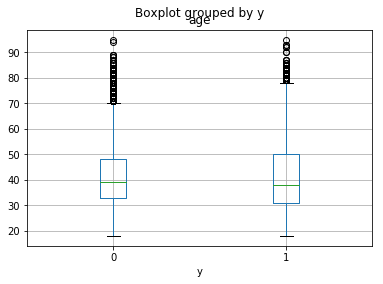

In [26]:
# Plotting Box Plot of Age by Status
df_bank_new.boxplot(column=['age'], return_type='axes', by='y')
plt.show()

In [27]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['age', 'balance', 'campaign', 'duration','pdays','previous']
err_yes = round(df_bank_new[df_bank_new['y'] == 1][subset_attributes].describe(),2)
err_no = round(df_bank_new[df_bank_new['y'] == 0][subset_attributes].describe(),2)
pd.concat([err_yes, err_no], axis=1, keys=['y=1 ', 'y=0'])

y=1                                                      y=0                                                   
           age   balance campaign duration    pdays previous       age    balance  campaign  duration     pdays  previous
count  5289.00   5289.00  5289.00  5289.00  5289.00  5289.00  39922.00   39922.00  39922.00  39922.00  39922.00  39922.00
mean     41.67   1804.27     2.14   537.29    68.70     1.17     40.84    1303.71      2.85    221.18     36.42      0.50
std      13.50   3501.10     1.92   392.53   118.82     2.55     10.17    2974.20      3.21    207.38     96.76      2.26
min      18.00  -3058.00     1.00     8.00    -1.00     0.00     18.00   -8019.00      1.00      0.00     -1.00      0.00
25%      31.00    210.00     1.00   244.00    -1.00     0.00     33.00      58.00      1.00     95.00     -1.00      0.00
50%      38.00    733.00     2.00   426.00    -1.00     0.00     39.00     417.00      2.00    164.00     -1.00      0.00
75%      50.00   2159.00     3.00   725.00    98.00     1.00     48.00    1345.00      3.00    279.00     -1.00      0.00
max      95.00  81204.00    32.00  3881.00   854.00    58.00     95.00  102127.00     63.00   4918.00    871.00    275.00

In [28]:
# Inferential Stats
from scipy import stats
F, p = stats.f_oneway(df_bank_new[df_bank_new['y'] == 1]['balance'], 
                      df_bank_new[df_bank_new['y'] == 0]['balance'])
print('ANOVA test for mean balance levels across y status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean balance levels across y status
F Statistic: 126.57227551143087  p-value: 2.5211136918594683e-29


/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


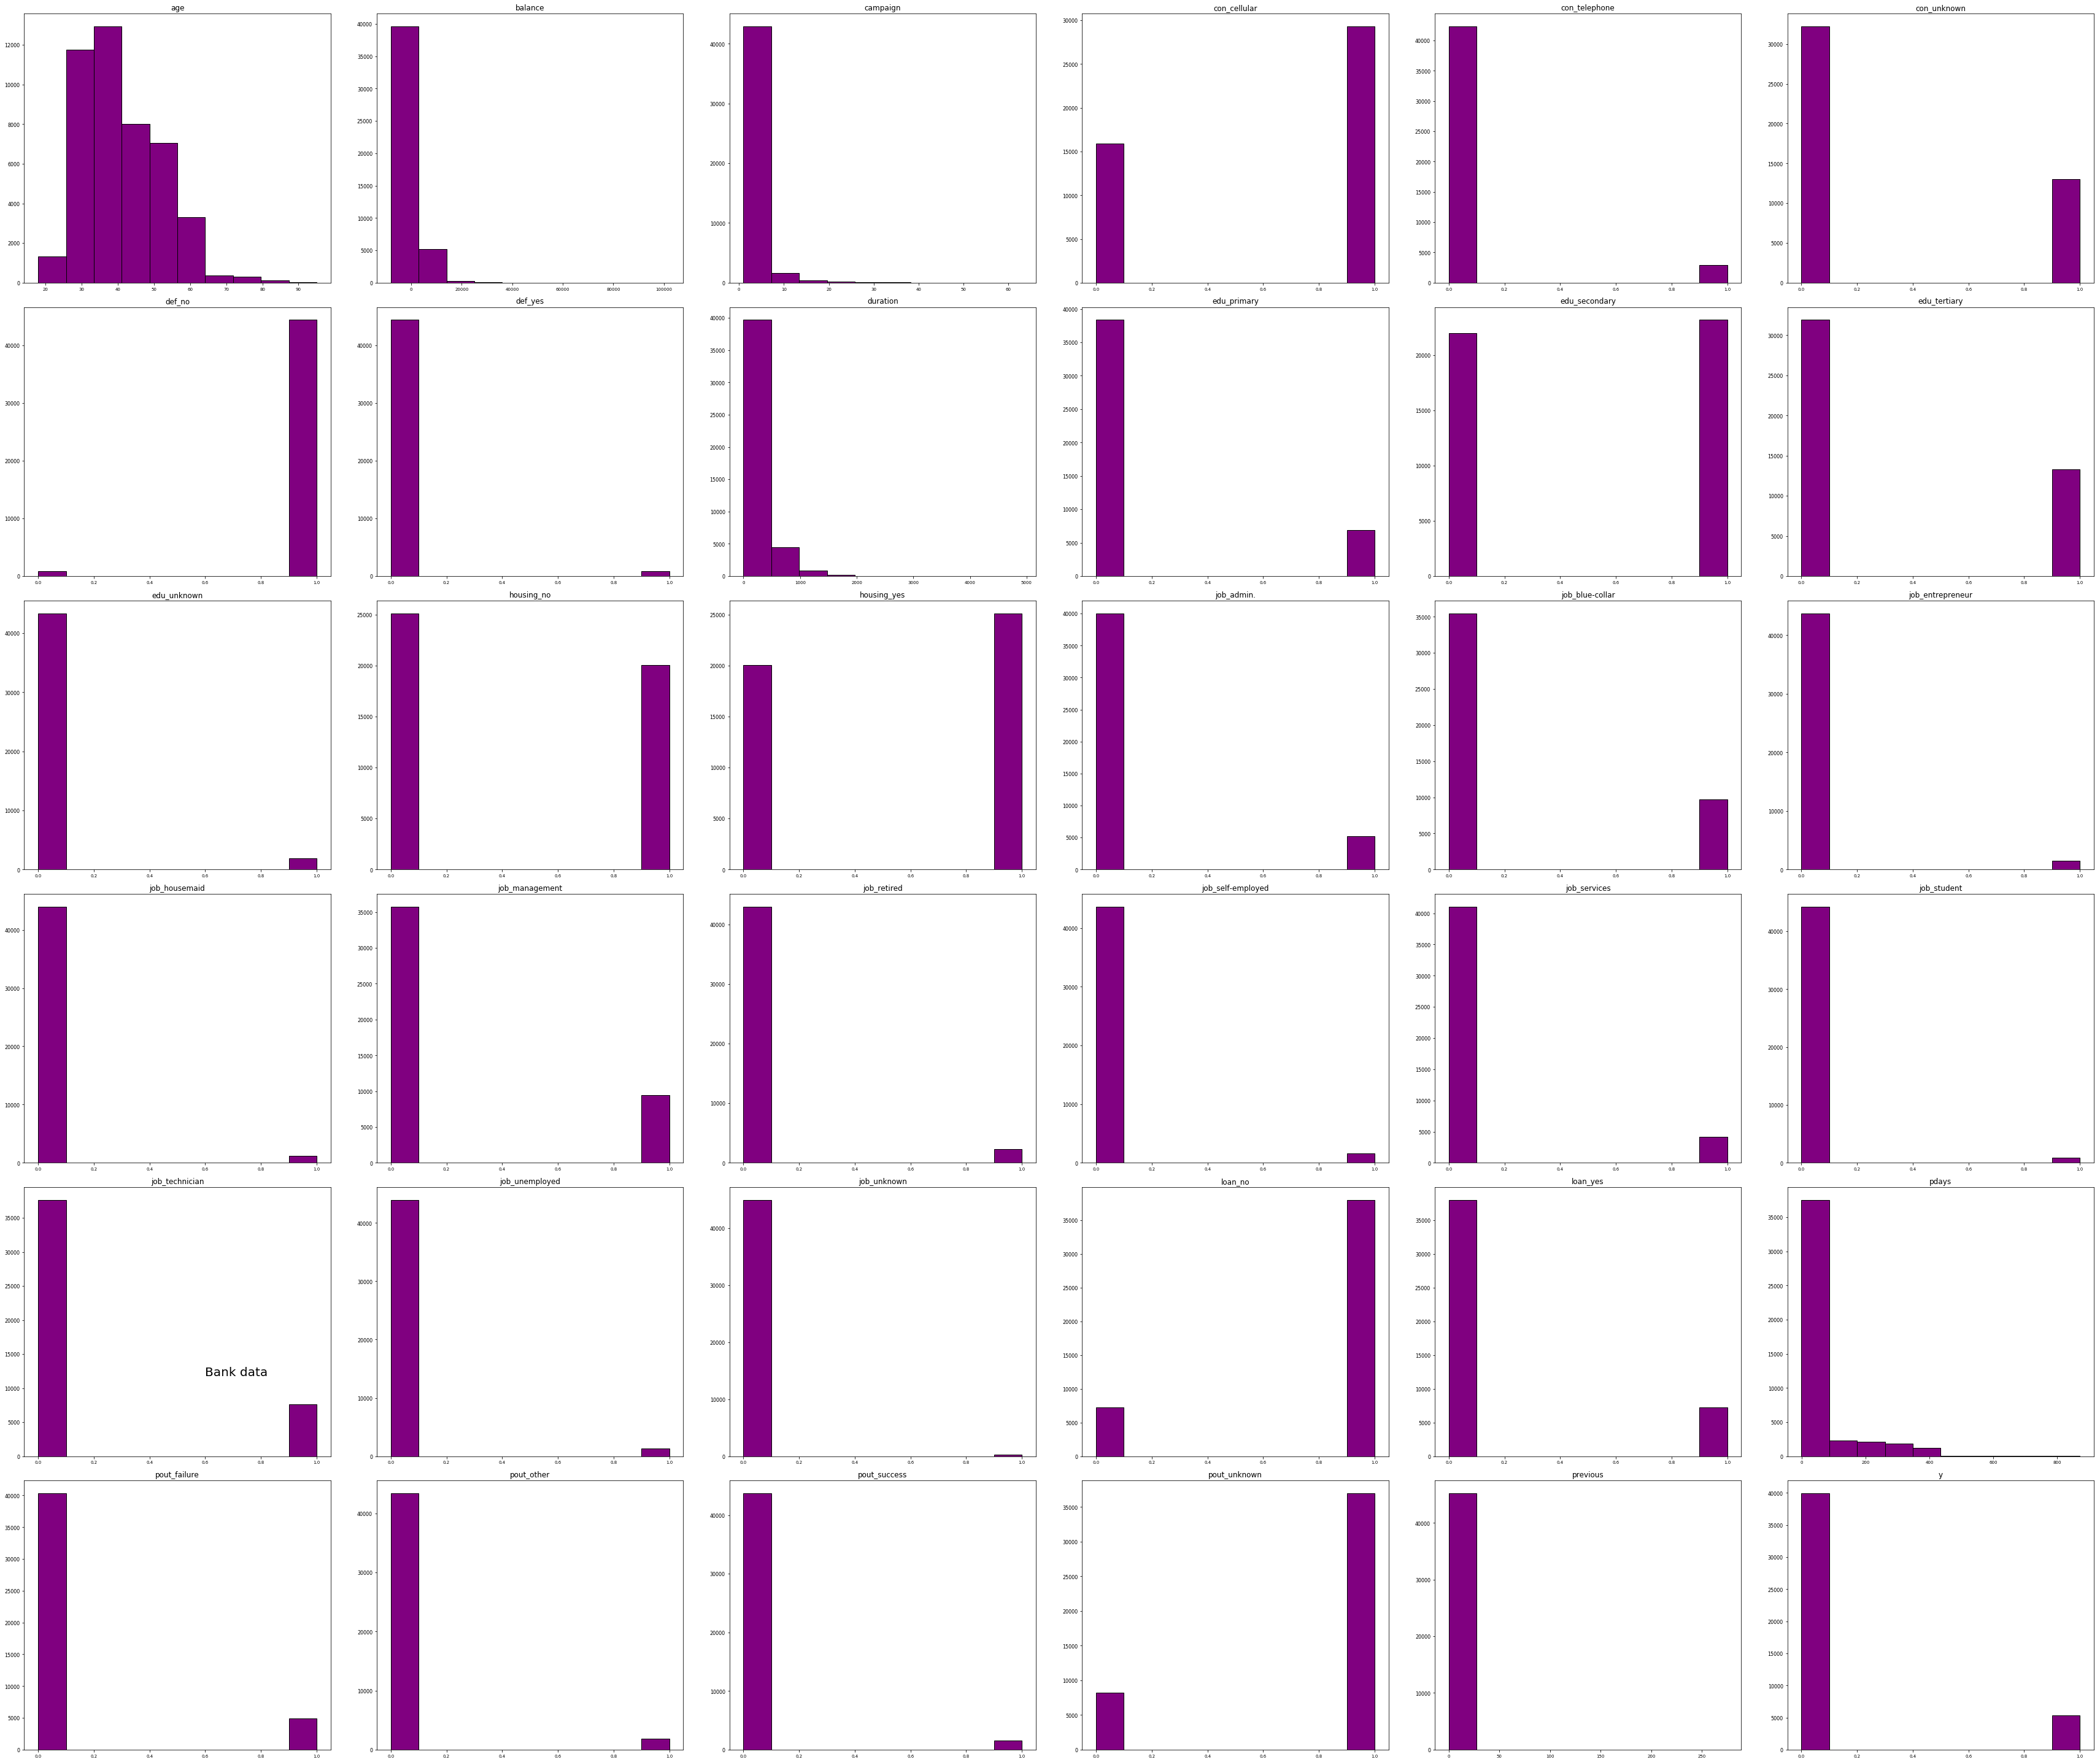

In [29]:
# Univariate analysis
df_bank_new.hist(bins=10, color='purple', edgecolor='black', linewidth=1.0,
              xlabelsize=7, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 8, 10))   
rt = plt.suptitle('Bank data', x=0.9, y=2.25, fontsize=20)

# Building the NB Classification Model for the Income Census Data

In [30]:
Y_bank_data = df_bank_new['y']
X_bank_data = df_bank_new.drop(['y'],axis=1)

In [31]:
print(Y_bank_data.shape)
print(X_bank_data.shape)

(45211,)
(45211, 35)


In [32]:
# Creating the Feature Space for Iris data
X_colnames_u = [cols for cols in df_bank_new.columns.tolist() if cols not in [
'y'
]]
X_colnames_u

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'edu_primary',
 'edu_secondary',
 'edu_tertiary',
 'edu_unknown',
 'def_no',
 'def_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'con_cellular',
 'con_telephone',
 'con_unknown',
 'pout_failure',
 'pout_other',
 'pout_success',
 'pout_unknown',
 'age',
 'balance',
 'duration',
 'pdays',
 'previous',
 'campaign']

In [36]:
# Scaling of Data
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler()
X = pd.DataFrame(SC.fit_transform(X_bank_data), columns = X_colnames_u)

/Users/ssg/Desktop/Python/packge/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,pout_failure,pout_other,pout_success,pout_unknown,age,balance,duration,pdays,previous,campaign
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.52,0.09,0.05,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.34,0.07,0.03,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.19,0.07,0.02,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.38,0.09,0.02,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.19,0.07,0.04,0.0,0.0,0.0


In [38]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X,Y_bank_data,train_size = 0.7,random_state=2)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 35)
(13564, 35)
(31647,)
(13564,)


In [40]:
# We are first building a model with default parameters for RandomForestClassifier()
from sklearn.naive_bayes import MultinomialNB,ComplementNB
clf_mnb = MultinomialNB()
clf_mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: MNB classifier
Test accuracy (Accuracy Score): 0.894942
Test accuracy (ROC AUC Score): 0.587790
Area Under the Precision-Recall Curve: 0.353463


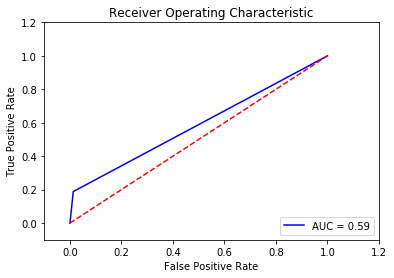

In [42]:
# Finding Accuracy of NB Classifier
y_pred = clf_mnb.predict(x_test)
model_perf('MNB classifier', x_train, y_train, y_test,y_pred)

# Model Performance measures

In [43]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), 
                             index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [44]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.89
Precision: 0.87
Recall: 0.89
F1 Score: 0.87
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.66      0.19      0.29      1565
           0       0.90      0.99      0.94     11999

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        295   1270
        0        155  11844


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


# Generating Decile Report

In [45]:
# Decile Report
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [46]:
train_decile, test_decile = Decile_report(clf_mnb, x_train, x_test, y_train, y_test)

In [47]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,1357,0.48,0.44,592.0,592.0,0.44,0.38,3.78
1,1,1357,0.23,0.16,217.0,809.0,0.30,0.52,2.58
2,2,1357,0.17,0.13,178.0,987.0,0.24,0.63,2.10
3,3,1357,0.12,0.09,121.0,1108.0,0.20,0.71,1.77
4,4,1356,0.09,0.10,135.0,1243.0,0.18,0.79,1.59
5,5,1356,0.07,0.06,87.0,1330.0,0.16,0.85,1.42
6,6,1356,0.05,0.06,85.0,1415.0,0.15,0.90,1.29
7,7,1356,0.03,0.04,57.0,1472.0,0.14,0.94,1.18
8,8,1356,0.02,0.04,48.0,1520.0,0.12,0.97,1.08
9,9,1356,0.01,0.03,45.0,1565.0,0.12,1.00,1.00


# Use of another NB algorithm - More suitable for imbalanced Data - Solution to HW assignment

In [48]:
# We are first building a model with default parameters for RandomForestClassifier()
from sklearn.naive_bayes import MultinomialNB,ComplementNB
clf_cnb = ComplementNB()
clf_cnb.fit(x_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

Model name: CNB classifier
Test accuracy (Accuracy Score): 0.662194
Test accuracy (ROC AUC Score): 0.675159
Area Under the Precision-Recall Curve: 0.352871


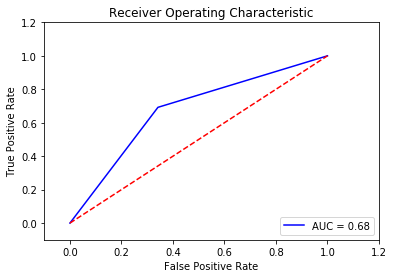

In [49]:
# Finding Accuracy of KNN Classifier
y_pred = clf_cnb.predict(x_test)
model_perf('CNB classifier', x_train, y_train, y_test,y_pred)

In [50]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.66
Precision: 0.86
Recall: 0.66
F1 Score: 0.72
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.21      0.69      0.32      1565
           0       0.94      0.66      0.78     11999

   micro avg       0.66      0.66      0.66     13564
   macro avg       0.58      0.68      0.55     13564
weighted avg       0.86      0.66      0.72     13564

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       1083   482
        0       4100  7899


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [51]:
train_decile, test_decile = Decile_report(clf_cnb, x_train, x_test, y_train, y_test)

In [52]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,1357,0.84,0.44,592.0,592.0,0.44,0.38,3.78
1,1,1357,0.69,0.16,217.0,809.0,0.30,0.52,2.58
2,2,1357,0.60,0.13,178.0,987.0,0.24,0.63,2.10
3,3,1357,0.52,0.09,121.0,1108.0,0.20,0.71,1.77
4,4,1356,0.44,0.10,135.0,1243.0,0.18,0.79,1.59
5,5,1356,0.36,0.06,87.0,1330.0,0.16,0.85,1.42
6,6,1356,0.28,0.06,85.0,1415.0,0.15,0.90,1.29
7,7,1356,0.21,0.04,57.0,1472.0,0.14,0.94,1.18
8,8,1356,0.13,0.04,48.0,1520.0,0.12,0.97,1.08
9,9,1356,0.07,0.03,45.0,1565.0,0.12,1.00,1.00
